In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename = "case_data.csv"
filepath = f"data/{filename}"

data = pd.read_csv(filepath)
df = data[:60]
df = df.dropna(subset=['R.4', 'A.4', 'S.4'])
df.rename(columns={'Age ': 'Age'}, inplace=True)

In [3]:
df.drop(columns=['Center Point (Left)'], inplace=True)
df.drop(columns=['Center Point (Right)'], inplace=True)
df.drop(columns=['Most Anterior Point on Iliac Crest (Left)'], inplace=True)
df.drop(columns=['Most Anterior Point on Iliac Crest (Right)'], inplace=True)
df.drop(columns=['Xyphoid Process'], inplace=True)

In [4]:
df['Torso Length'] = df['S.4'] - (df['S.2'] + df['S.3']) / 2
df['Torso Width'] = df['R.1'] - df['R']
df['Left Center Point'] = list(zip(df['R'], df['A'], df['S']))
df['Right Center Point'] = list(zip(df['R.1'], df['A.1'], df['S.1']))
df['Left Illiac Crest'] = list(zip(df['R.2'], df['A.2'], df['S.2']))
df['Right Illiac Crest'] = list(zip(df['R.3'], df['A.3'], df['S.3']))
df['Xyphoid Process'] = list(zip(df['R.4'], df['A.4'], df['S.4']))

In [5]:
df.drop(columns=['R', 'A', 'S'], inplace=True)
df.drop(columns=['R.1', 'A.1', 'S.1'], inplace=True)
df.drop(columns=['R.2', 'A.2', 'S.2'], inplace=True)
df.drop(columns=['R.3', 'A.3', 'S.3'], inplace=True)
df.drop(columns=['R.4', 'A.4', 'S.4'], inplace=True)

In [6]:
include_columns = ['Case Number', 'Age', 'Gender', 'BMI', 'Torso Length', 'Torso Width', 'Left Illiac Crest', 'Right Illiac Crest', 'Xyphoid Process']

left_kidney_data = ['Left Center Point', 'LR1', 'LR2', 'PA1', 'PA2', 'IS1', 'IS2']
right_kidney_data = ['Right Center Point', 'LR1.1', 'LR2.1', 'PA1.1', 'PA2.1', 'IS1.1', 'IS2.1']

left_kidney = df[include_columns + left_kidney_data].copy()
right_kidney = df[include_columns + right_kidney_data].copy()

left_kidney.loc[:,'LR'] = left_kidney['LR2'] - left_kidney['LR1']
left_kidney.loc[:,'PA'] = left_kidney['PA2'] - left_kidney['PA1']
left_kidney.loc[:,'IS'] = left_kidney['IS2'] - left_kidney['IS1']
left_kidney.drop(columns=['LR1', 'LR2', 'PA1', 'PA2', 'IS1', 'IS2'], inplace=True)

right_kidney.loc[:,'LR'] = right_kidney['LR2.1'] - right_kidney['LR1.1']
right_kidney.loc[:,'PA'] = right_kidney['PA2.1'] - right_kidney['PA1.1']
right_kidney.loc[:,'IS'] = right_kidney['IS2.1'] - right_kidney['IS1.1']
right_kidney.drop(columns=['LR1.1', 'LR2.1', 'PA1.1', 'PA2.1', 'IS1.1', 'IS2.1'], inplace=True)

In [7]:
def calculate_distance(point1, point2):
    if pd.isna(point1) or pd.isna(point2):  # Check for NaN values
        return np.nan
    return np.sqrt((point1[0] - point2[0]) ** 2 +
                   (point1[1] - point2[1]) ** 2 +
                   (point1[2] - point2[2]) ** 2)

left_kidney['Center Distance from IC'] = left_kidney.apply(
    lambda row: calculate_distance(row['Left Illiac Crest'], row['Left Center Point']), axis=1
)
right_kidney['Center Distance from IC'] = right_kidney.apply(
    lambda row: calculate_distance(row['Right Illiac Crest'], row['Right Center Point']), axis=1
)

left_kidney['Gender'] = left_kidney['Gender'].map({'male': 1, 'female': 0})

In [8]:
left_kidney

,Case Number,Age,Gender,BMI,Torso Length,Torso Width,Left Illiac Crest,Right Illiac Crest,Xyphoid Process,Left Center Point,LR,PA,IS,Center Distance from IC
0,case_00000,49,1,29.47,266.9510,137.430,"(-126.811, 8.642, -112.065)","(132.939, 23.984, -116.837)","(-2.211, 53.167, 152.5)","(-65.897, -78.243, 52.806)",78.17,62.93,112.21,196.066227
1,case_00001,50,1,33.71,262.6500,254.099,"(-121.16, 8.642, -131.844)","(132.939, 16.92, -129.552)","(5.686, 126.479, 131.952)","(-121.16, 8.642, -131.844)",86.19,91.49,117.34,0.000000
2,case_00002,74,1,28.13,245.6135,143.556,"(-99.603, -43.905, -43.905)","(132.939, -38.321, -81.048)","(0.127, 120.438, 183.137)","(-57.666, -98.83, 66.496)",86.19,85.84,114.51,130.245339
3,case_00003,44,0,38.69,NaN,130.318,"(nan, nan, nan)","(nan, nan, nan)","(-10.406, 60.701, 125.215)","(-69.8, -49.757, -25.746)",75.14,85.85,129.23,NaN
4,case_00004,73,1,28.59,NaN,165.332,"(nan, nan, nan)","(nan, nan, nan)","(-10.406, 147.535, 115.411)","(-88.007, -39.953, -21.969)",89.15,85.85,123.62,NaN
6,case_00006,69,1,24.42,312.1270,148.366,"(-126.811, 34.065, -87.98)","(132.939, 40.988, -94.09)","(-10.406, 109.699, 221.092)","(-75.244, -49.697, 78.646)",77.48,72.90,107.65,193.492770
9,case_00009,73,0,22.90,234.2040,127.017,"(-118.982, -3.39, -112.537)","(141.253, 5.623, -113.115)","(10.856, 58.678, 121.378)","(-47.076, -47.341, 3.716)",73.15,72.73,109.78,143.585944
10,case_00010,71,0,33.13,239.6385,124.698,"(-118.982, -3.39, -117.972)","(141.253, -17.201, -118.549)","(19.55, 80.415, 121.378)","(-60.985, -39.126, -21.193)",66.49,86.96,105.74,118.350702
11,case_00011,65,0,31.47,229.1115,129.496,"(-118.982, 43.147, -42.625)","(141.253, 18.257, -31.014)","(0.315, 83.564, 192.292)","(-78.045, -19.002, 87.303)",83.57,92.71,120.12,149.731831
12,case_00012,62,0,30.92,242.0550,116.552,"(-118.982, 43.147, -46.323)","(117.527, 36.747, -53.203)","(13.256, 88.956, 192.292)","(-63.869, -19.002, 86.071)",79.87,92.71,117.66,156.294953


In [9]:
right_kidney

,Case Number,Age,Gender,BMI,Torso Length,Torso Width,Left Illiac Crest,Right Illiac Crest,Xyphoid Process,Right Center Point,LR,PA,IS,Center Distance from IC
0,case_00000,49,male,29.47,266.9510,137.430,"(-126.811, 8.642, -112.065)","(132.939, 23.984, -116.837)","(-2.211, 53.167, 152.5)","(71.533, -54.667, 26.686)",78.170,94.03,105.53,174.801396
1,case_00001,50,male,33.71,262.6500,254.099,"(-121.16, 8.642, -131.844)","(132.939, 16.92, -129.552)","(5.686, 126.479, 131.952)","(132.939, -38.321, -81.048)",78.840,101.36,121.14,73.513306
2,case_00002,74,male,28.13,245.6135,143.556,"(-99.603, -43.905, -43.905)","(132.939, -38.321, -81.048)","(0.127, 120.438, 183.137)","(85.89, -113.997, 114.957)",78.840,82.99,123.97,215.310068
3,case_00003,44,female,38.69,NaN,130.318,"(nan, nan, nan)","(nan, nan, nan)","(-10.406, 60.701, 125.215)","(60.518, -28.842, -50.373)",68.230,90.38,97.01,NaN
4,case_00004,73,male,28.59,NaN,165.332,"(nan, nan, nan)","(nan, nan, nan)","(-10.406, 147.535, 115.411)","(77.325, -40.897, -9.574)",82.230,90.39,125.03,NaN
6,case_00006,69,male,24.42,312.1270,148.366,"(-126.811, 34.065, -87.98)","(132.939, 40.988, -94.09)","(-10.406, 109.699, 221.092)","(73.122, -44.72, 79.679)",87.700,64.94,102.28,202.779684
9,case_00009,73,female,22.90,234.2040,127.017,"(-118.982, -3.39, -112.537)","(141.253, 5.623, -113.115)","(10.856, 58.678, 121.378)","(79.941, -44.72, -30.7)",64.140,64.94,97.32,114.393231
10,case_00010,71,female,33.13,239.6385,124.698,"(-118.982, -3.39, -117.972)","(141.253, -17.201, -118.549)","(19.55, 80.415, 121.378)","(63.713, -32.33, -51.02)",63.920,79.66,91.43,103.930285
11,case_00011,65,female,31.47,229.1115,129.496,"(-118.982, 43.147, -42.625)","(141.253, 18.257, -31.014)","(0.315, 83.564, 192.292)","(51.451, -32.33, -32.33)",68.560,79.66,98.07,103.078493
12,case_00012,62,female,30.92,242.0550,116.552,"(-118.982, 43.147, -46.323)","(117.527, 36.747, -53.203)","(13.256, 88.956, 192.292)","(52.683, -50.204, 106.577)",71.030,68.57,99.31,193.118795


Distance of Left Centerpoint from Left Iliac Crest (Age)

/var/folders/6f/ccz_rb517dq8nw76mbry_49r0000gn/T/ipykernel_49213/4120668094.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_kidney['Age Group'] = pd.cut(left_kidney['Age'], bins=bins, labels=labels, right=False)
/var/folders/6f/ccz_rb517dq8nw76mbry_49r0000gn/T/ipykernel_49213/4120668094.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = left_kidney.groupby('Age Group')['Center Distance from IC'].mean()


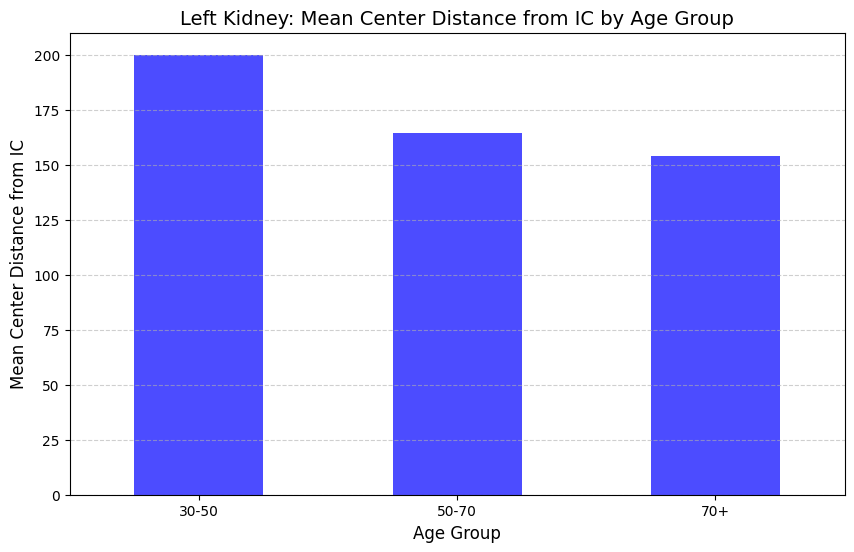

In [10]:
left_kidney = left_kidney.dropna(subset=['Age', 'Center Distance from IC'])

bins = [30, 50, 70, 100]  # Combine 50-60 and 60-70 into 50-70
labels = ['30-50', '50-70', '70+']  # Updated labels

left_kidney['Age Group'] = pd.cut(left_kidney['Age'], bins=bins, labels=labels, right=False)

grouped_data = left_kidney.groupby('Age Group')['Center Distance from IC'].mean()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Left Kidney: Mean Center Distance from IC by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Mean Center Distance from IC', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

/var/folders/6f/ccz_rb517dq8nw76mbry_49r0000gn/T/ipykernel_49213/695244210.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=left_kidney, x='Age Group', y='Center Distance from IC', palette='Blues')


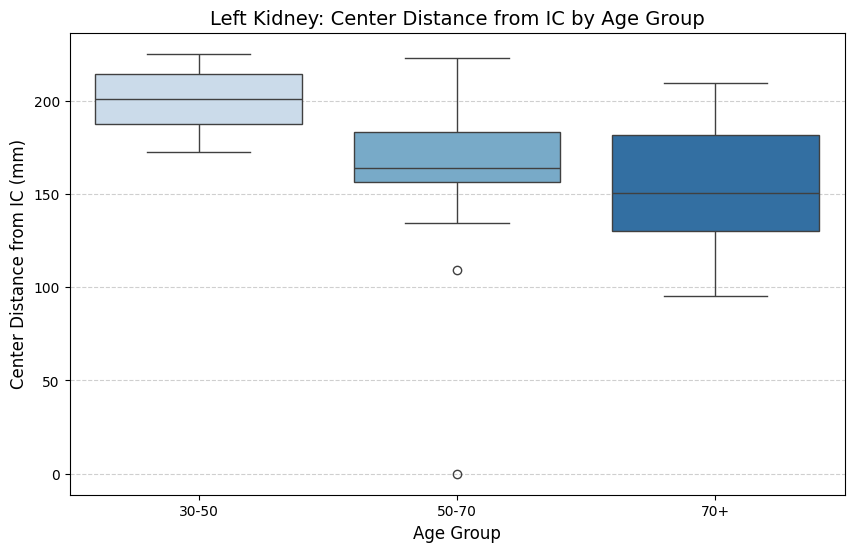

In [11]:
# Ensure Age Group column is created
left_kidney = left_kidney.dropna(subset=['Age', 'Center Distance from IC'])
bins = [30, 50, 70, 100]  # Combine 50-60 and 60-70 into 50-70
labels = ['30-50', '50-70', '70+']  # Updated labels
left_kidney['Age Group'] = pd.cut(left_kidney['Age'], bins=bins, labels=labels, right=False)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=left_kidney, x='Age Group', y='Center Distance from IC', palette='Blues')
plt.title('Left Kidney: Center Distance from IC by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Center Distance from IC (mm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Distance of Right Centerpoint from Left Iliac Crest (Age)

/var/folders/6f/ccz_rb517dq8nw76mbry_49r0000gn/T/ipykernel_49213/2243940630.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_kidney['Age Group'] = pd.cut(right_kidney['Age'], bins=bins, labels=labels, right=False)
/var/folders/6f/ccz_rb517dq8nw76mbry_49r0000gn/T/ipykernel_49213/2243940630.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = right_kidney.groupby('Age Group')['Center Distance from IC'].mean()


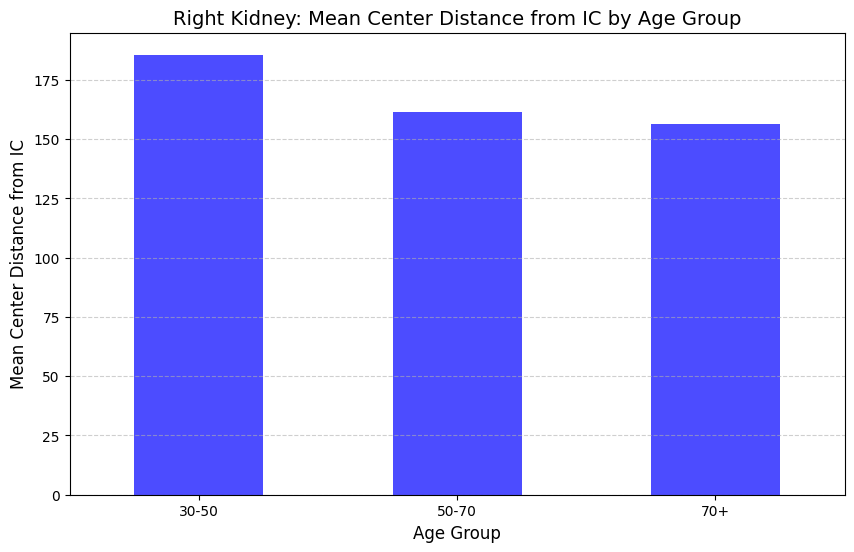

In [12]:
right_kidney = right_kidney.dropna(subset=['Age', 'Center Distance from IC'])

bins = [30, 50, 70, 100]  # Combine 50-60 and 60-70 into 50-70
labels = ['30-50', '50-70', '70+']  # Updated labels

right_kidney['Age Group'] = pd.cut(right_kidney['Age'], bins=bins, labels=labels, right=False)

grouped_data = right_kidney.groupby('Age Group')['Center Distance from IC'].mean()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Right Kidney: Mean Center Distance from IC by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Mean Center Distance from IC', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

/var/folders/6f/ccz_rb517dq8nw76mbry_49r0000gn/T/ipykernel_49213/3236595124.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=right_kidney, x='Age Group', y='Center Distance from IC', palette='Blues')


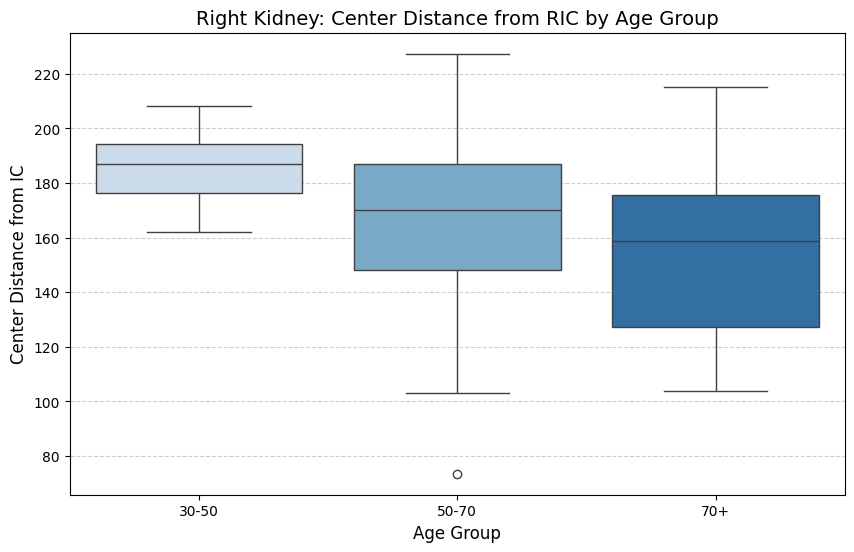

In [13]:
# Ensure Age Group column is created
right_kidney = right_kidney.dropna(subset=['Age', 'Center Distance from IC'])
bins = [30, 50, 70, 100]  # Combine 50-60 and 60-70 into 50-70
labels = ['30-50', '50-70', '70+']  # Updated labels
right_kidney['Age Group'] = pd.cut(right_kidney['Age'], bins=bins, labels=labels, right=False)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=right_kidney, x='Age Group', y='Center Distance from IC', palette='Blues')
plt.title('Right Kidney: Center Distance from RIC by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Center Distance from IC', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Data Next to Each Other

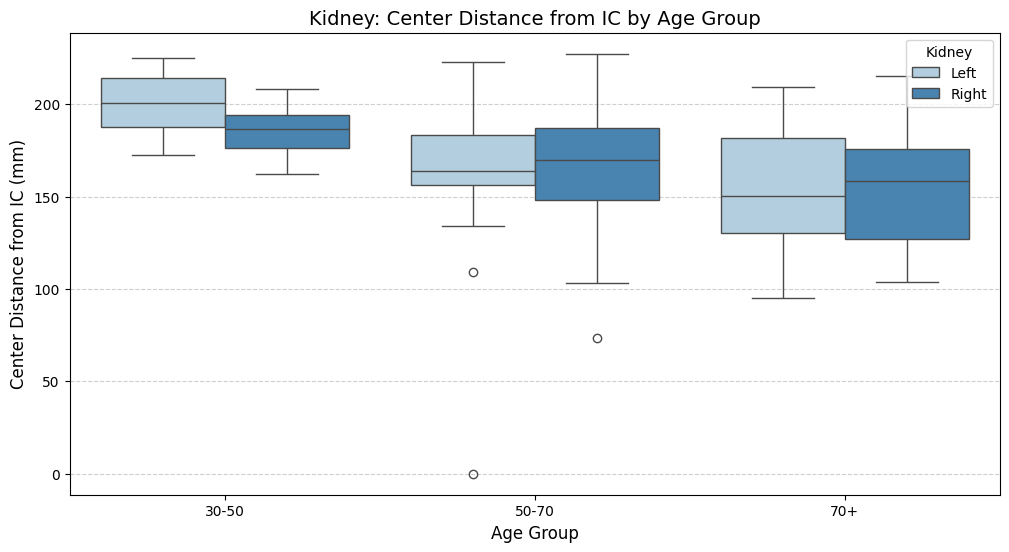

In [14]:
left_kidney = left_kidney.dropna(subset=['Age', 'Center Distance from IC'])
right_kidney = right_kidney.dropna(subset=['Age', 'Center Distance from IC'])

left_kidney['Age Group'] = pd.cut(left_kidney['Age'], bins=bins, labels=labels, right=False)
right_kidney['Age Group'] = pd.cut(right_kidney['Age'], bins=bins, labels=labels, right=False)

# Add a 'Kidney' column to distinguish between left and right kidneys
left_kidney['Kidney'] = 'Left'
right_kidney['Kidney'] = 'Right'

# Combine the two datasets
combined_data = pd.concat([left_kidney, right_kidney])

# Ensure columns have consistent types
combined_data['Age Group'] = combined_data['Age Group'].astype('category')
combined_data['Kidney'] = combined_data['Kidney'].astype('category')

# Remove rows with missing values
combined_data = combined_data.dropna(subset=['Age Group','Center Distance from IC', 'Kidney'])

# Create a combined box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='Age Group', y='Center Distance from IC', hue='Kidney', palette='Blues')
plt.title('Kidney: Center Distance from IC by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Center Distance from IC (mm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Kidney', loc='upper right')
plt.show()

Distance of Left Centerpoint from Left Iliac Crest (Gender)

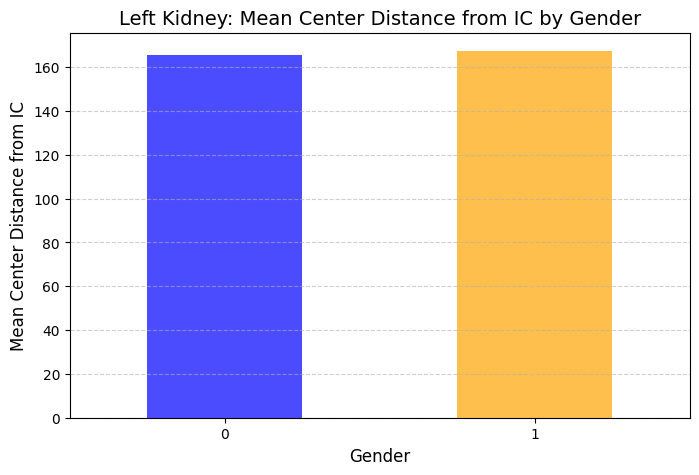

In [15]:
left_kidney = left_kidney.dropna(subset=['Gender', 'Center Distance from IC'])

grouped_data = left_kidney.groupby('Gender')['Center Distance from IC'].mean()

plt.figure(figsize=(8, 5))
grouped_data.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Left Kidney: Mean Center Distance from IC by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Center Distance from IC', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Distance of Right Centerpoint from Left Iliac Crest (Gender)

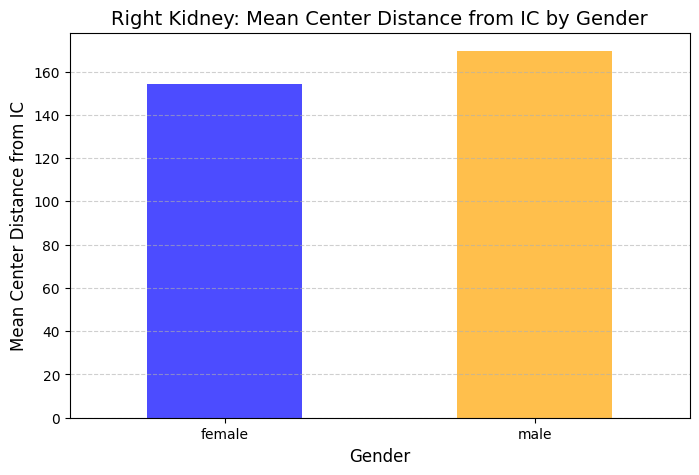

In [16]:
right_kidney = right_kidney.dropna(subset=['Gender', 'Center Distance from IC'])

grouped_data = right_kidney.groupby('Gender')['Center Distance from IC'].mean()

plt.figure(figsize=(8, 5))
grouped_data.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Right Kidney: Mean Center Distance from IC by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Center Distance from IC', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

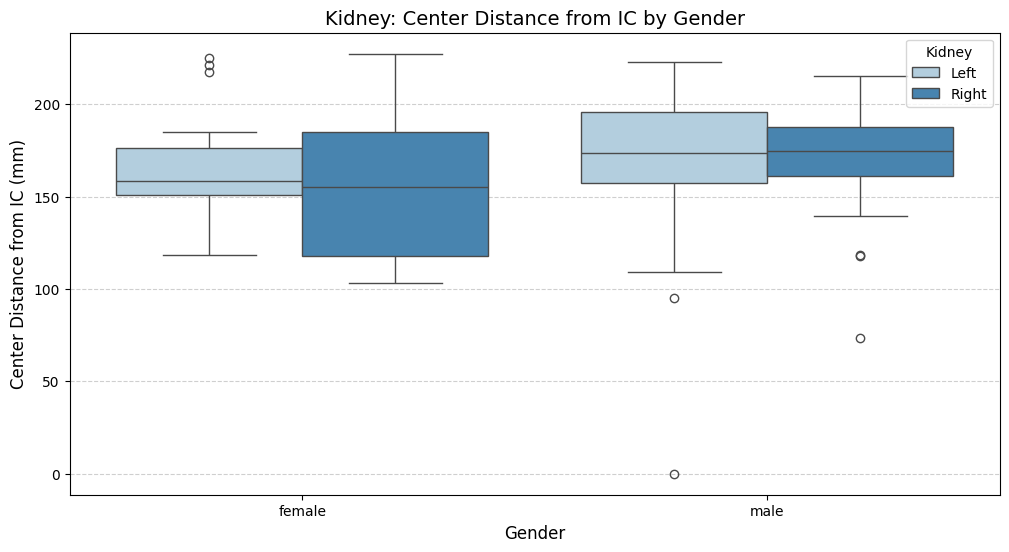

In [17]:
# Drop missing values
left_kidney = left_kidney.dropna(subset=['Gender', 'Center Distance from IC'])
right_kidney = right_kidney.dropna(subset=['Gender', 'Center Distance from IC'])

# Add a 'Kidney' column to distinguish between left and right kidneys
left_kidney['Kidney'] = 'Left'
right_kidney['Kidney'] = 'Right'

# Combine the two datasets
combined_data = pd.concat([left_kidney, right_kidney])

# Map numeric Gender values to string labels
gender_map = {0: 'female', 1: 'male'}
combined_data['Gender'] = combined_data['Gender'].map(gender_map)

# Ensure columns have consistent types
combined_data['Gender'] = combined_data['Gender'].astype('category')
combined_data['Kidney'] = combined_data['Kidney'].astype('category')

# Create a combined box plot with side-by-side orientation
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='Gender', y='Center Distance from IC', hue='Kidney', dodge=True, palette='Blues')
plt.title('Kidney: Center Distance from IC by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Center Distance from IC (mm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Kidney', loc='upper right')
plt.show()

Distance of Left Centerpoint from Left Iliac Crest (BMI)

/var/folders/6f/ccz_rb517dq8nw76mbry_49r0000gn/T/ipykernel_49213/3525779688.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = left_kidney.groupby('BMI Category')['Center Distance from IC'].mean()


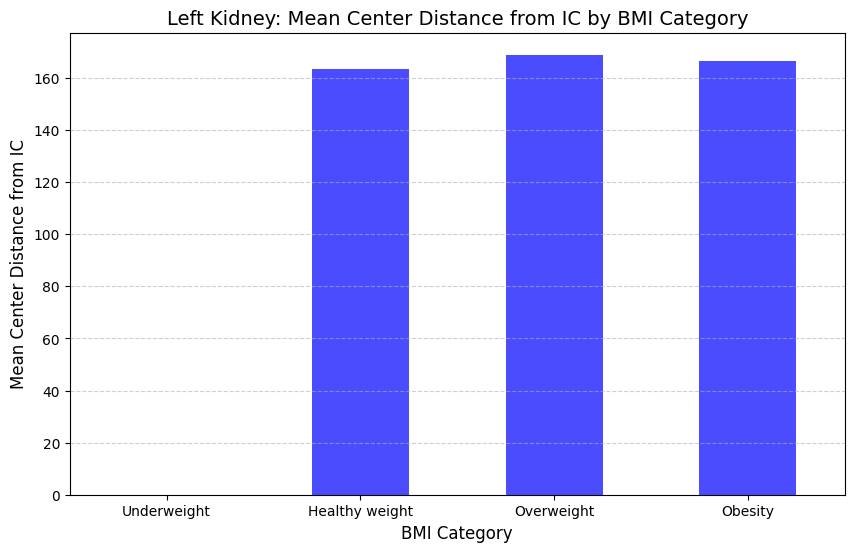

In [18]:
left_kidney = left_kidney.dropna(subset=['BMI', 'Center Distance from IC'])

bins = [0, 18.5, 25, 30, float('inf')]  # Inf handles BMIs above 30
labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity']

left_kidney['BMI Category'] = pd.cut(left_kidney['BMI'], bins=bins, labels=labels, right=False)

grouped_data = left_kidney.groupby('BMI Category')['Center Distance from IC'].mean()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Left Kidney: Mean Center Distance from IC by BMI Category', fontsize=14)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Mean Center Distance from IC', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Distance of Right Centerpoint from Left Illiac Crest (BMI)

/var/folders/6f/ccz_rb517dq8nw76mbry_49r0000gn/T/ipykernel_49213/3471350631.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = right_kidney.groupby('BMI Category')['Center Distance from IC'].mean()


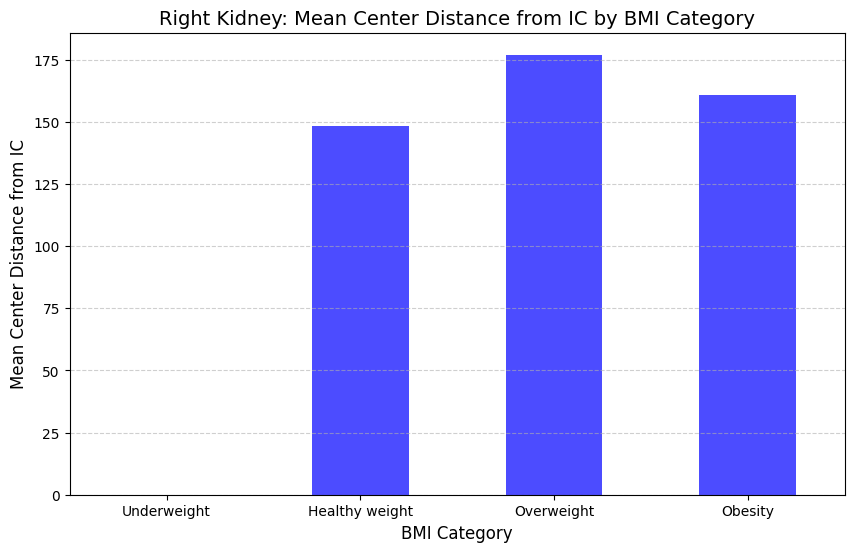

In [19]:
right_kidney = right_kidney.dropna(subset=['BMI', 'Center Distance from IC'])

bins = [0, 18.5, 25, 30, float('inf')]  # Inf handles BMIs above 30
labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity']

right_kidney['BMI Category'] = pd.cut(right_kidney['BMI'], bins=bins, labels=labels, right=False)

grouped_data = right_kidney.groupby('BMI Category')['Center Distance from IC'].mean()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Right Kidney: Mean Center Distance from IC by BMI Category', fontsize=14)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Mean Center Distance from IC', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

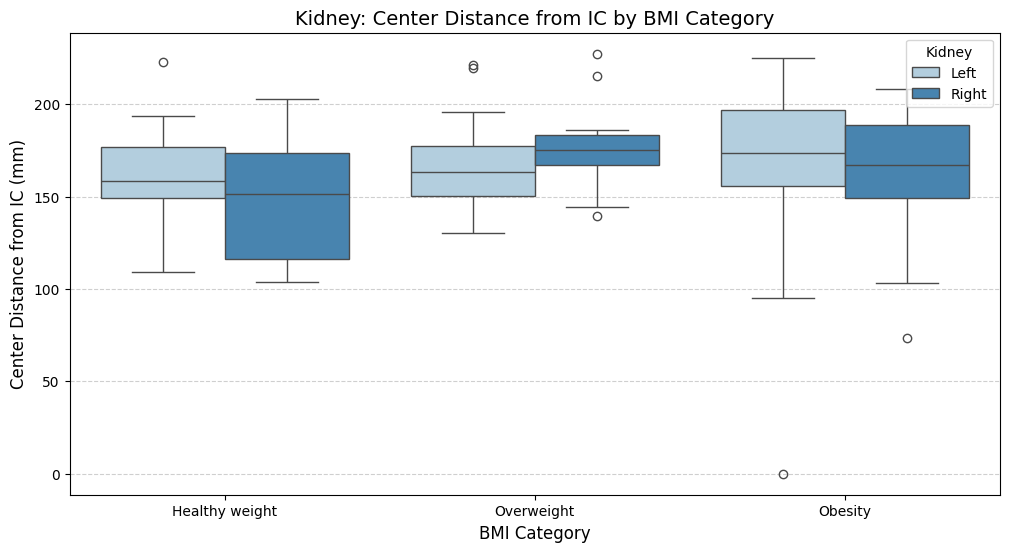

In [20]:
# Drop missing values for BMI and Center Distance from LIC
left_kidney = left_kidney.dropna(subset=['BMI', 'Center Distance from IC'])
right_kidney = right_kidney.dropna(subset=['BMI', 'Center Distance from IC'])

# Define BMI categories (without Underweight)
bins = [18.5, 25, 30, float('inf')]  # Categories for BMI
labels = ['Healthy weight', 'Overweight', 'Obesity']

# Assign BMI categories
left_kidney['BMI Category'] = pd.cut(left_kidney['BMI'], bins=bins, labels=labels, right=False)
right_kidney['BMI Category'] = pd.cut(right_kidney['BMI'], bins=bins, labels=labels, right=False)

# Add a 'Kidney' column to distinguish between left and right kidneys
left_kidney['Kidney'] = 'Left'
right_kidney['Kidney'] = 'Right'

# Combine the two datasets
combined_data = pd.concat([left_kidney, right_kidney])

# Ensure columns have consistent types
combined_data['BMI Category'] = combined_data['BMI Category'].astype('category')
combined_data['Kidney'] = combined_data['Kidney'].astype('category')

# Create a combined box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='BMI Category', y='Center Distance from IC', hue='Kidney', palette='Blues')
plt.title('Kidney: Center Distance from IC by BMI Category', fontsize=14)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Center Distance from IC (mm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Kidney', loc='upper right')
plt.show()

Left Iliac Crest as the Reference Point

Translate the coordinates around the new reference point (Left Iliac Crest)

In [21]:
def subtract_tuples(coord1, coord2):
    if pd.isna(coord1) or pd.isna(coord2):
        return None
    return tuple(c1 - c2 for c1, c2 in zip(coord1, coord2))

# Subtract 'Left Iliac Crest' from 'Left Center Point'
left_kidney['Left Center Point'] = left_kidney.apply(
    lambda row: subtract_tuples(row['Left Center Point'], row['Left Illiac Crest']), axis=1
)

# Subtract 'Left Iliac Crest' from itself (resulting in zero vectors)
left_kidney['Left Illiac Crest'] = left_kidney['Left Illiac Crest'].apply(lambda x: subtract_tuples(x, x))      

In [75]:
X = left_kidney[['Torso Length', 'Torso Width']]
y = pd.DataFrame(left_kidney['Left Center Point'].tolist(), columns=['x', 'y', 'z'])

data = pd.concat([X, y], axis=1).dropna()
data.drop(index=[1], inplace=True)
X = data[['Torso Length', 'Torso Width']]
y = data[['x', 'y', 'z']]

# Check if data is available
if X.empty or y.empty:
    print("No data available after preprocessing. Please check the input data.")
else:
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model for each target variable
    models = {}
    coefficients = {}
    for coord in ['x', 'y', 'z']:
        model = LinearRegression()
        model.fit(X_train, y_train[coord])
        models[coord] = model
        coefficients[coord] = model.coef_

    # Evaluate the model
    for coord in ['x', 'y', 'z']:
        y_pred = models[coord].predict(X_test)
        mae = mean_absolute_error(y_test[coord], y_pred)
        print(f"Mean Absolute Error for {coord}: {mae:.4f}")
    
# Save the models
import joblib
for coord in ['x', 'y', 'z']:
    print(f"Equation for {coord}:")
    print(f"y_{coord} = {models[coord].intercept_:.4f} ", end="")
    for i, feature in enumerate(X.columns):
        print(f"+ ({models[coord].coef_[i]:.4f} * {feature}) ", end="")
    print("\n")

Mean Absolute Error for x: 18.4170
Mean Absolute Error for y: 24.5633
Mean Absolute Error for z: 33.7781
Equation for x:
y_x = 107.2195 + (-0.1772 * Torso Length) + (-0.0725 * Torso Width) 

Equation for y:
y_y = -20.7046 + (-0.1115 * Torso Length) + (-0.1203 * Torso Width) 

Equation for z:
y_z = 70.7967 + (0.0066 * Torso Length) + (0.5101 * Torso Width) 



In [76]:
left_kidney

,Case Number,Age,Gender,BMI,Torso Length,Torso Width,Left Illiac Crest,Right Illiac Crest,Xyphoid Process,Left Center Point,LR,PA,IS,Center Distance from IC,Age Group,Kidney,BMI Category
0,case_00000,49,1,29.47,266.9510,137.430,"(0.0, 0.0, 0.0)","(132.939, 23.984, -116.837)","(-2.211, 53.167, 152.5)","(60.914, -86.88499999999999, 164.87099999999998)",78.17,62.93,112.21,196.066227,30-50,Left,Overweight
1,case_00001,50,1,33.71,262.6500,254.099,"(0.0, 0.0, 0.0)","(132.939, 16.92, -129.552)","(5.686, 126.479, 131.952)","(0.0, 0.0, 0.0)",86.19,91.49,117.34,0.000000,50-70,Left,Obesity
2,case_00002,74,1,28.13,245.6135,143.556,"(0.0, 0.0, 0.0)","(132.939, -38.321, -81.048)","(0.127, 120.438, 183.137)","(41.937, -54.925, 110.401)",86.19,85.84,114.51,130.245339,70+,Left,Overweight
6,case_00006,69,1,24.42,312.1270,148.366,"(0.0, 0.0, 0.0)","(132.939, 40.988, -94.09)","(-10.406, 109.699, 221.092)","(51.56700000000001, -83.762, 166.626)",77.48,72.90,107.65,193.492770,50-70,Left,Healthy weight
9,case_00009,73,0,22.90,234.2040,127.017,"(0.0, 0.0, 0.0)","(141.253, 5.623, -113.115)","(10.856, 58.678, 121.378)","(71.906, -43.951, 116.253)",73.15,72.73,109.78,143.585944,70+,Left,Healthy weight
10,case_00010,71,0,33.13,239.6385,124.698,"(0.0, 0.0, 0.0)","(141.253, -17.201, -118.549)","(19.55, 80.415, 121.378)","(57.997, -35.736, 96.779)",66.49,86.96,105.74,118.350702,70+,Left,Obesity
11,case_00011,65,0,31.47,229.1115,129.496,"(0.0, 0.0, 0.0)","(141.253, 18.257, -31.014)","(0.315, 83.564, 192.292)","(40.937, -62.149, 129.928)",83.57,92.71,120.12,149.731831,50-70,Left,Obesity
12,case_00012,62,0,30.92,242.0550,116.552,"(0.0, 0.0, 0.0)","(117.527, 36.747, -53.203)","(13.256, 88.956, 192.292)","(55.113, -62.149, 132.394)",79.87,92.71,117.66,156.294953,50-70,Left,Obesity
13,case_00013,83,0,22.86,225.5080,114.101,"(0.0, 0.0, 0.0)","(121.449, 15.178, -88.497)","(5.413, 70.768, 138.49)","(67.36800000000001, -76.36500000000001, 117.19...",68.14,72.13,102.94,155.259241,70+,Left,Healthy weight
14,case_00014,67,0,29.43,261.4530,123.240,"(0.0, 0.0, 0.0)","(121.449, 22.489, -64.127)","(5.413, 93.919, 201.851)","(53.96400000000001, -76.365, 150.70600000000002)",68.14,72.13,109.04,177.358465,50-70,Left,Overweight


In [69]:
data

,Torso Length,Torso Width,x,y,z
0,266.9510,137.430,60.914,-86.885,164.871
2,245.6135,143.556,41.937,-54.925,110.401
6,312.1270,148.366,40.937,-62.149,129.928
9,234.2040,127.017,53.964,-76.365,150.706
10,239.6385,124.698,50.931,-33.634,90.508
11,229.1115,129.496,44.690,-102.444,133.660
12,242.0550,116.552,77.672,-79.186,147.904
13,225.5080,114.101,58.436,-47.870,145.315
14,261.4530,123.240,29.289,-87.278,179.618
15,226.7020,144.547,36.889,-61.257,142.297


In [72]:
# Prepare the data
X = left_kidney[['Torso Length', 'Torso Width']]
y = pd.DataFrame(left_kidney['Left Center Point'].tolist(), columns=['x', 'y', 'z'])

data = pd.concat([X, y], axis=1).dropna()
data = data.drop(index=1)

X = data[['Torso Length', 'Torso Width']]
y = data[['x', 'y', 'z']]

# Check if data is available
if X.empty or y.empty:
    print("No data available after preprocessing. Please check the input data.")
else:
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define a dictionary to store models and errors
    models = {}
    errors = {}

    # Train and evaluate KNN Regressor for each target variable
    for coord in ['x', 'y', 'z']:
        print(f"Training KNN for {coord}:")
        model_knn = KNeighborsRegressor(n_neighbors=12)  # Number of neighbors can be adjusted
        model_knn.fit(X_train, y_train[coord])          # Train the model
        models[coord] = model_knn
        
        # Predict and evaluate
        y_pred = model_knn.predict(X_test)
        mae = mean_absolute_error(y_test[coord], y_pred)
        errors[coord] = mae
        print(f"Mean Absolute Error for {coord}: {mae:.4f}")

    # Print overall results
    print("\nKNN Regression Results:")
    for coord in ['x', 'y', 'z']:
        print(f"{coord}: Test Set MAE = {errors[coord]:.4f}")


Training KNN for x:
Mean Absolute Error for x: 16.1807
Training KNN for y:
Mean Absolute Error for y: 20.9969
Training KNN for z:
Mean Absolute Error for z: 25.5149

KNN Regression Results:
x: Test Set MAE = 16.1807
y: Test Set MAE = 20.9969
z: Test Set MAE = 25.5149


In [23]:
data

,Age,Gender,BMI,Torso Length,Torso Width,x,y,z
0,49.0,1.0,29.47,266.9510,137.430,60.914,-86.885,164.871
2,74.0,1.0,28.13,245.6135,143.556,41.937,-54.925,110.401
6,69.0,1.0,24.42,312.1270,148.366,40.937,-62.149,129.928
9,73.0,0.0,22.90,234.2040,127.017,53.964,-76.365,150.706
10,71.0,0.0,33.13,239.6385,124.698,50.931,-33.634,90.508
11,65.0,0.0,31.47,229.1115,129.496,44.690,-102.444,133.660
12,62.0,0.0,30.92,242.0550,116.552,77.672,-79.186,147.904
13,83.0,0.0,22.86,225.5080,114.101,58.436,-47.870,145.315
14,67.0,0.0,29.43,261.4530,123.240,29.289,-87.278,179.618
15,59.0,1.0,24.29,226.7020,144.547,36.889,-61.257,142.297


In [ ]:
left_kidney.to_csv('leftkidney.csv', index=False)